In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from text2topics import reports
from text2topics import utilities
from text2topics import clean
import re
import os
from os import listdir
from os.path import isfile, join
import collections

In [4]:
%matplotlib inline

In [5]:
wordlist_dir = "/Users/jeriwieringa/Dissertation/drafts/data/word-lists"
wordlists = ["2016-12-07-SDA-last-names.txt", 
             "2016-12-07-SDA-place-names.txt", 
             "2016-12-08-SDA-Vocabulary.txt", 
             "2017-01-03-place-names.txt", 
             "2017-02-14-Base-Word-List-SCOWL&KJV.txt",
             "2017-02-14-Roman-Numerals.txt",
             "2017-03-01-Additional-Approved-Words.txt"
            ]

In [6]:
spelling_dictionary = utilities.create_spelling_dictionary(wordlist_dir, wordlists)

In [7]:
title = "AmSn"

In [8]:
base_dir = "/Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/{}/".format(title)

## Baseline

In [9]:
cycle = 'baseline'

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/AmSn/baseline

Average verified rate: 0.9417475625771581

Average of error rates: 0.059656669650850494

Total token count: 8534424



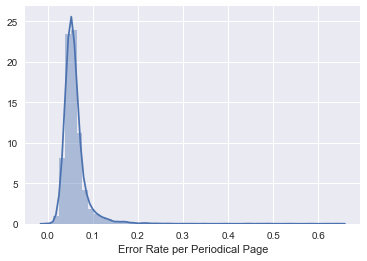

In [10]:
stats = reports.overview_report(join(base_dir, cycle), spelling_dictionary, title)

In [11]:
errors_summary = reports.get_errors_summary( stats )
reports.top_errors( errors_summary, 100 )

[('-', 12650),
 ('ñ', 11855),
 ("'", 8075),
 ('tion', 6722),
 ('con-', 5879),
 ('re-', 5789),
 ('¥', 5128),
 ('t', 4124),
 ('ment', 4081),
 ('in-', 3962),
 (')', 3929),
 ('d', 3884),
 ('e', 3716),
 ('w', 3705),
 ('co', 3389),
 ('m', 3097),
 ('de-', 2928),
 ('com-', 2715),
 ('n', 2658),
 ('be-', 2447),
 ('pro-', 2149),
 ('sun-', 1953),
 ('f', 1919),
 ('ex-', 1874),
 ('chris-', 1869),
 ('*', 1867),
 ('r', 1832),
 ('tions', 1677),
 ('th', 1673),
 ('en-', 1576),
 ('dis-', 1563),
 ('govern-', 1495),
 ('(', 1448),
 ('gov-', 1339),
 ('g', 1311),
 ('per-', 1282),
 ('sab-', 1252),
 ('tian', 1181),
 ('mo', 1146),
 ('un-', 1141),
 ('na-', 1133),
 ('ernment', 1060),
 ('reli-', 1056),
 ('ance', 1023),
 ('ob-', 1011),
 ('pre-', 998),
 ('ments', 942),
 ('ad-', 937),
 ('ity', 935),
 ('sunday-law', 923),
 ('ac-', 911),
 ('tional', 911),
 ('ñthe', 905),
 ('u', 881),
 (']', 868),
 ('ligious', 836),
 ('im-', 815),
 ('ap-', 807),
 ('ple', 790),
 ('sub-', 738),
 ('x', 730),
 ('ence', 714),
 ('an-', 698),
 (

## Correction 1 -- Special Characters

The first common error appears to be dangling line endings. However, in order to best capture and fix those endings, I am first normalizing the line ending characters and address special characters. Before removing, I will check for regular non-English language use to see if there are particular characters that should be preserved.

In [12]:
reports.tokens_with_special_characters(errors_summary)

[('ñ', 11855),
 ('¥', 5128),
 (')', 3929),
 ('*', 1867),
 ('(', 1448),
 ('ñthe', 905),
 (']', 868),
 ('_', 511),
 ('/', 510),
 ('[the', 409),
 ('ña', 338),
 ('%', 335),
 ('=', 291),
 ('¥¥', 281),
 ('ñthat', 277),
 ('ñno', 260),
 ('(the', 240),
 ('ã', 226),
 ('ñand', 218),
 ('**', 216),
 ('***', 198),
 ('ñthomas', 167),
 ('`', 165),
 ('ñi', 162),
 ('ñit', 162),
 ('(see', 159),
 ('(entered', 153),
 ('ñrev', 146),
 ('[from', 145),
 ('(and', 139),
 ('ô', 132),
 ('thatñ', 126),
 ('¡', 125),
 ('ñnew', 122),
 ('\\', 110),
 ('libertyñchristian', 109),
 ('%x', 107),
 ('ñjesus', 106),
 ('ñto', 105),
 ('ñin', 104),
 ('ñnot', 103),
 ('•', 102),
 ('`the', 98),
 ('ñchristian', 96),
 ('-¥', 94),
 ('ñany', 90),
 ('(a', 85),
 ('(which', 80),
 ('[', 80),
 ('(or', 78),
 ('(as', 78),
 ('ñbut', 73),
 ('¤', 72),
 ('ñby', 71),
 ('(new', 68),
 ('(for', 68),
 ('(in', 67),
 ('[of', 67),
 ('ñis', 66),
 ('[sunday]', 66),
 ('ñas', 66),
 ('ñwhich', 65),
 ('libertyñchris-', 65),
 ('<', 64),
 ('ñif', 64),
 ('the¥', 6

No obvious foreign language character use. "ñ" appears attached to words as an OCR noise element.

In [13]:
# %load shared_elements/normalize_characters.py
prev = "baseline"
cycle = "correction1"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    # Substitute for all other dashes
    content = re.sub(r"—-—–‑", r"-", content)

    # Substitute formatted apostrophe
    content = re.sub(r"\’\’\‘\'\‛\´", r"'", content)
    
    # Replace all special characters with a space (as these tend to occur at the end of lines)
    content = re.sub(r"[^a-zA-Z0-9\s,.!?$:;\-&\'\"]", r" ", content)
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/AmSn/correction1

Average verified rate: 0.9493256707400606

Average of error rates: 0.051667561921814396

Total token count: 8518613



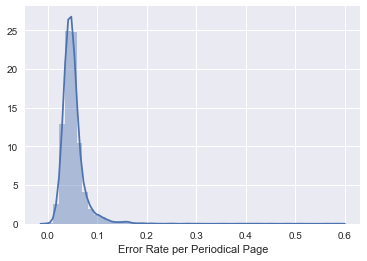

In [14]:
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [15]:
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 500 )

[('-', 13223),
 ("'", 8384),
 ('tion', 6765),
 ('con-', 5889),
 ('re-', 5797),
 ('t', 4325),
 ('ment', 4118),
 ('in-', 3972),
 ('d', 3947),
 ('e', 3885),
 ('w', 3760),
 ('co', 3427),
 ('m', 3164),
 ('n', 2998),
 ('de-', 2931),
 ('com-', 2716),
 ('be-', 2455),
 ('pro-', 2155),
 ('f', 2010),
 ('r', 1978),
 ('sun-', 1967),
 ('chris-', 1947),
 ('ex-', 1880),
 ('th', 1703),
 ('tions', 1683),
 ('en-', 1577),
 ('dis-', 1566),
 ('govern-', 1495),
 ('g', 1356),
 ('gov-', 1340),
 ('per-', 1284),
 ('sab-', 1254),
 ('tian', 1190),
 ('mo', 1156),
 ('un-', 1145),
 ('na-', 1136),
 ('ernment', 1070),
 ('reli-', 1058),
 ('ance', 1036),
 ('ob-', 1011),
 ('pre-', 999),
 ('ments', 947),
 ('ity', 944),
 ('sunday-law', 940),
 ('ad-', 939),
 ('tional', 914),
 ('u', 913),
 ('ac-', 913),
 ('x', 860),
 ('ligious', 838),
 ('im-', 816),
 ('ap-', 811),
 ('ple', 798),
 ('sub-', 740),
 ('ence', 722),
 ('an-', 700),
 ('gious', 675),
 ('relig-', 666),
 ('ers', 628),
 ('ques-', 625),
 ('peo-', 625),
 ('at-', 603),
 ("'

## Correction 2 -- Correct line endings

Reconnect words that were split due to line-endings.

In [16]:
# %load shared_elements/correct_line_endings.py
prev = cycle
cycle = "correction2"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    content = re.sub(r"(\w+)(\-\s{1,})([a-z]+)", r"\1\3", content)

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/AmSn/correction2

Average verified rate: 0.9777065723174374

Average of error rates: 0.024393763055804242

Total token count: 8357037



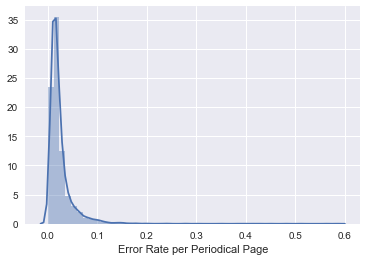

In [17]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [18]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 250 )

[('-', 13127),
 ("'", 8384),
 ('t', 4309),
 ('d', 3941),
 ('e', 3874),
 ('w', 3758),
 ('co', 3424),
 ('m', 3155),
 ('n', 2990),
 ('f', 1989),
 ('r', 1971),
 ('th', 1703),
 ('g', 1339),
 ('mo', 1156),
 ('sunday-law', 976),
 ('u', 911),
 ('x', 860),
 ("'the", 600),
 ('--', 418),
 ('pa', 415),
 ('q', 373),
 ('chain-gang', 353),
 ('sunday-closing', 335),
 ('tion', 327),
 ("the'", 313),
 ('k', 304),
 ('ex', 304),
 ('sunday-rest', 299),
 ('pp', 298),
 ('-the', 289),
 ("conscience'", 265),
 ('ch', 257)]

## Correction 3 -- Remove extra dashes

In [19]:
# %load shared_elements/remove_extra_dashes.py
prev = cycle
cycle = "correction3"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    replacements = []
    for token in tokens:
        if token[0] is "-":
            replacements.append((token, token[1:]))
            
        elif token[-1] is "-":
            replacements.append((token, token[:-1]))
        else:
            pass
        
    if len(replacements) > 0:
#         print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/AmSn/correction3

Average verified rate: 0.9814938307988949

Average of error rates: 0.020385108922709644

Total token count: 8367534



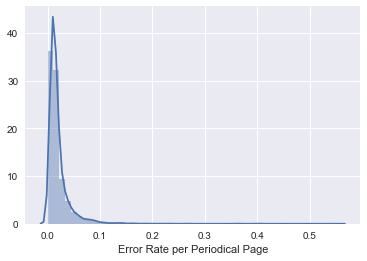

In [20]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [21]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 8554),
 ('t', 4413),
 ('e', 4034),
 ('d', 3964),
 ('w', 3794),
 ('co', 3624),
 ('m', 3204),
 ('n', 3085),
 ('r', 2060),
 ('f', 2026),
 ('th', 1718),
 ('g', 1378),
 ('mo', 1162),
 ('u', 928),
 ('x', 864),
 ("'the", 601),
 ('ex', 539),
 ('re', 505),
 ('pa', 423),
 ('q', 399),
 ('sunday-law', 334),
 ('tion', 328),
 ('k', 319),
 ("the'", 313),
 ('pp', 299),
 ("conscience'", 265),
 ('ch', 260),
 ('seventhday', 249),
 ("'of", 238),
 ('ti', 228),
 ('ga', 227),
 ('oc', 219),
 ('z', 215),
 ('wm', 215),
 ('un', 210),
 ('satolli', 210),
 ('employes', 209),
 ('munn', 206),
 ('ca', 205),
 ('al', 204),
 ('yo', 202),
 ('mc', 191),
 ('ry', 185),
 ('id', 185),
 ('ment', 183),
 ("'a", 175),
 ('sunday-closing', 159),
 ("'to", 154),
 ('se', 153),
 ('nd', 152)]

## Correction 4 -- Remove extra quotation marks

In [22]:
# %load shared_elements/remove_extra_quotation_marks.py
prev = cycle
cycle = "correction4"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    corrections = []
    for token in tokens:
        token_list = list(token)
        last_char = token_list[-1]

        if last_char is "'":
            if len(token) > 1:
                if token_list[-2] is 's' or 'S':
                    pass
                else:
                    corrections.append((token, re.sub(r"'", r"", token)))
            else:
                pass
        elif token[0] is "'":
            corrections.append((token, re.sub(r"'", r"", token)))   
        else:
            pass
    
    if len(corrections) > 0:
#         print('{}: {}'.format(filename, corrections))

        for correction in corrections:
            content = clean.replace_pair(correction, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/AmSn/correction4

Average verified rate: 0.9824621432313876

Average of error rates: 0.01930259623992838

Total token count: 8367328



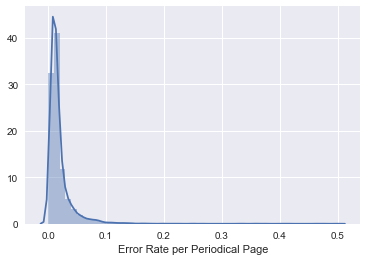

In [23]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [24]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 8053),
 ('t', 4487),
 ('e', 4070),
 ('d', 3979),
 ('w', 3797),
 ('co', 3626),
 ('m', 3209),
 ('n', 3104),
 ('r', 2078),
 ('f', 2046),
 ('th', 1721),
 ('g', 1386),
 ('mo', 1165),
 ('u', 930),
 ('x', 865),
 ('ex', 539),
 ('re', 508),
 ('pa', 427),
 ('q', 401),
 ('sunday-law', 334),
 ('tion', 329),
 ('k', 320),
 ("the'", 304),
 ('pp', 299),
 ("conscience'", 261),
 ('ch', 260),
 ('seventhday', 249),
 ('ti', 230),
 ('ga', 228),
 ('oc', 219),
 ('z', 217),
 ('wm', 215),
 ('un', 210),
 ('satolli', 210),
 ('employes', 209),
 ('al', 208),
 ('munn', 207),
 ('ca', 206),
 ('yo', 203),
 ('mc', 191),
 ('id', 189),
 ('ry', 186),
 ('ment', 183),
 ('sunday-closing', 160),
 ('nd', 159),
 ('se', 157),
 ('tinel', 147),
 ('ll', 141),
 ('il', 137),
 ('chain-gang', 136)]

## Correction 5 -- Rejoin Burst Words

Check errors to see if they form verified tokens when joined with the preceding token.

In [25]:
# %load shared_elements/rejoin_burst_words.py
prev = cycle
cycle = "correction5"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    pattern = re.compile("(\s(\w{1,2}\s){5,})")
    
    replacements = []
    clean.check_splits(pattern, spelling_dictionary, content, replacements)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/AmSn/correction5

Average verified rate: 0.9824669426623706

Average of error rates: 0.01929677708146822

Total token count: 8367280



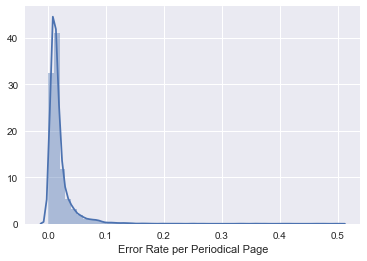

In [26]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [27]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 8053),
 ('t', 4483),
 ('e', 4047),
 ('d', 3973),
 ('w', 3794),
 ('co', 3626),
 ('m', 3202),
 ('n', 3097),
 ('r', 2062),
 ('f', 2043),
 ('th', 1721),
 ('g', 1386),
 ('mo', 1165),
 ('u', 930),
 ('x', 865),
 ('ex', 539),
 ('re', 508),
 ('pa', 427),
 ('q', 401),
 ('sunday-law', 334),
 ('tion', 329),
 ('k', 320),
 ("the'", 304),
 ('pp', 299),
 ("conscience'", 261),
 ('ch', 260),
 ('seventhday', 249),
 ('ti', 230),
 ('ga', 228),
 ('oc', 219),
 ('z', 217),
 ('wm', 215),
 ('un', 210),
 ('satolli', 210),
 ('employes', 209),
 ('al', 208),
 ('munn', 207),
 ('ca', 206),
 ('yo', 203),
 ('mc', 191),
 ('id', 189),
 ('ry', 186),
 ('ment', 183),
 ('sunday-closing', 160),
 ('nd', 159),
 ('se', 157),
 ('tinel', 147),
 ('ll', 141),
 ('il', 137),
 ('chain-gang', 136)]


## Correction 6 -- Rejoin Split Words

In [28]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction6"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    errors = reports.identify_errors(tokens, spelling_dictionary)

    replacements = clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=False)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/AmSn/correction6

Average verified rate: 0.9828407009325851

Average of error rates: 0.018864070426738287

Total token count: 8365027



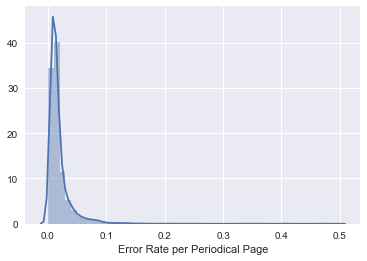

In [29]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [30]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )

[("'", 8053),
 ('t', 4443),
 ('e', 3991),
 ('d', 3960),
 ('w', 3791),
 ('co', 3415),
 ('m', 3195),
 ('n', 3057),
 ('r', 2043),
 ('f', 2042),
 ('th', 1658),
 ('g', 1377),
 ('mo', 1161),
 ('u', 927),
 ('x', 864),
 ('ex', 523),
 ('pa', 410),
 ('q', 399),
 ('sunday-law', 334),
 ('k', 318),
 ("the'", 304),
 ('pp', 299),
 ('tion', 281),
 ('re', 279),
 ("conscience'", 260),
 ('ch', 254),
 ('seventhday', 249),
 ('ga', 221),
 ('oc', 218),
 ('z', 215),
 ('wm', 215),
 ('satolli', 210),
 ('employes', 209),
 ('munn', 207),
 ('ti', 203),
 ('id', 186),
 ('ry', 183),
 ('al', 175),
 ('un', 174),
 ('ment', 173),
 ('ca', 170),
 ('sunday-closing', 160),
 ('nd', 158),
 ('tinel', 147),
 ('se', 143),
 ('ll', 141),
 ('chain-gang', 136),
 ("to'", 134),
 ('il', 127),
 ('lb', 125),
 ('bateham', 122),
 ('cmsar', 121),
 ('aleck', 112),
 ("and'", 109),
 ('socalled', 106),
 ('te', 105),
 ('sunday-rest', 104),
 ('cc', 104),
 ('sentin', 104),
 ('milly', 103),
 ('erican', 102),
 ("of'", 98),
 ('va', 97),
 ('cd', 94),
 

## Correction 7 -- Rejoin Split Words II

In [31]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction7"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    errors = reports.identify_errors(tokens, spelling_dictionary)

    replacements = clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=True)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

AmSn18860101-V01-01-page3.txt: [('to', 're')]
AmSn18860301-V01-03-page1.txt: [('SEN', 'TINEL')]
AmSn18860301-V01-03-page3.txt: [('in', 'stitutions')]
AmSn18860301-V01-03-page8.txt: [('SEN', 'TINEL')]
AmSn18860401-V01-04-page1.txt: [('am', 'endmentists')]
AmSn18860601-V01-06-page1.txt: [('he', 're'), ('in', 'stitute')]
AmSn18860601-V01-06-page7.txt: [('PAR', 'LIAMENTARY'), ('AMER', 'ICAN')]
AmSn18860701-V01-07-page3.txt: [('fruit', 'ful')]
AmSn18860701-V01-07-page5.txt: [('a', 'ment')]
AmSn18860701-V01-07-page6.txt: [('Ch', 'aldea')]
AmSn18860801-V01-08-page1.txt: [('amen', 'dmentists')]
AmSn18860801-V01-08-page5.txt: [('the', 'Re')]
AmSn18860801-V01-08-page6.txt: [('to', 're')]
AmSn18860901-V01-09-page3.txt: [('Nation', 'al'), ('a', 'Na')]
AmSn18860901-V01-09-page4.txt: [('Amen', 'dmentists'), ('in', 'sistency')]
AmSn18860901-V01-09-page7.txt: [('and', 're')]
AmSn18861001-V01-10-page3.txt: [('when', 'ce')]
AmSn18861001-V01-10-page5.txt: [('be', 'ment')]
AmSn18861101-V01-11-page6.txt: [

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/AmSn/correction7

Average verified rate: 0.9830117359134304

Average of error rates: 0.018671590569979114

Total token count: 8363303



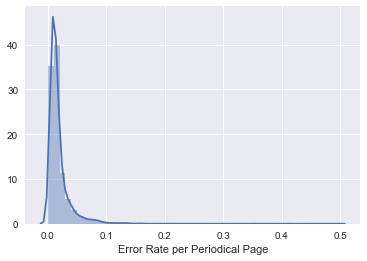

In [32]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [33]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )

[("'", 8053),
 ('t', 4426),
 ('e', 3978),
 ('d', 3950),
 ('w', 3754),
 ('co', 3408),
 ('m', 3176),
 ('n', 3046),
 ('f', 2035),
 ('r', 2028),
 ('th', 1645),
 ('g', 1371),
 ('mo', 1160),
 ('u', 926),
 ('x', 864),
 ('ex', 521),
 ('pa', 410),
 ('q', 399),
 ('sunday-law', 334),
 ('k', 315),
 ("the'", 304),
 ('pp', 299),
 ('tion', 276),
 ("conscience'", 260),
 ('ch', 253),
 ('seventhday', 249),
 ('re', 224),
 ('ga', 220),
 ('oc', 218),
 ('z', 215),
 ('wm', 215),
 ('satolli', 210),
 ('employes', 209),
 ('munn', 207),
 ('ti', 200),
 ('id', 181),
 ('un', 173),
 ('ry', 170),
 ('al', 166),
 ('sunday-closing', 160),
 ('ca', 151),
 ('ment', 146),
 ('chain-gang', 136),
 ("to'", 134),
 ('nd', 130),
 ('ll', 128),
 ('lb', 125),
 ('il', 123),
 ('bateham', 122),
 ('cmsar', 121),
 ('se', 120),
 ('aleck', 112),
 ("and'", 109),
 ('socalled', 106),
 ('sunday-rest', 104),
 ('sentin', 104),
 ('milly', 103),
 ('cc', 101),
 ('te', 101),
 ('erican', 99),
 ("of'", 98),
 ('va', 95),
 ('nt', 92),
 ('fellow-citizens'

## Review Remaining Errors

In [34]:
reports.docs_with_high_error_rate( summary , min_error_rate = .2 )

[('AmSn18900918-V05-37-page4.txt', 0.495),
 ('AmSn18900918-V05-37-page1.txt', 0.472),
 ('AmSn18900918-V05-37-page8.txt', 0.459),
 ('AmSn18900918-V05-37-page5.txt', 0.413),
 ('AmSn18970701-V12-26-page1.txt', 0.404),
 ('AmSn18980616-V13-24-page15.txt', 0.371),
 ('AmSn18980630-V13-26-page15.txt', 0.356),
 ('AmSn18980609-V13-23-page15.txt', 0.351),
 ('AmSn18980623-V13-25-page15.txt', 0.335),
 ('AmSn18980714-V13-27-page15.txt', 0.325),
 ('AmSn18960220-V11-08-page7.txt', 0.262),
 ('AmSn18971007-V12-39-page16.txt', 0.246),
 ('AmSn18971014-V12-40-page16.txt', 0.238),
 ('AmSn18951031-V10-43-page7.txt', 0.224),
 ('AmSn18951219-V10-50-page7.txt', 0.215),
 ('AmSn18951024-V10-42-page7.txt', 0.204)]

In [35]:
docs_2_check = [x[0] for x in reports.docs_with_high_error_rate( summary , min_error_rate = .2 ) if x[1] > 0.2]

In [36]:
# utilities.open_original_docs(docs_2_check, directories['cycle'])

There are two main drivers of the OCR errors. First, the original scans of `AmSn18900918-V05-37` captured either the layer behind or the shadow of text on the next page. This makes clean OCR all but impossible from that scan. The other major driver of errors is the advertisement sections of the publications, particularly ads for an Interlinear Greek New Testament. 

## Check Long Errors

In [37]:
reports.long_errors(errors_summary, min_length=15)

(['intensely-orthodox',
  'rezteoxfebeiloenir',
  'virreasetiabwayi',
  'pleasant-spirited',
  'eheapserviceable',
  'poreversepalialf',
  'estabtablishment',
  'pfopositionbliat',
  'christiancitizenship',
  'cliiynirtreczenanmouesna',
  'themonthlypaymentwillbe',
  'choochee-choochee',
  "sup'ercalendered",
  'laicciohuasrmaniangstsrtsltyittzfhefrir',
  'massachusetts--mr',
  'malrithinrinodths',
  'gamblingfraternity',
  'theoriesodfisease',
  'sabbath-profanation',
  'subscripmountains',
  'forty-eight-page',
  'couldfollybegreaterthanpraying',
  'increasing-favor',
  "considerable'part",
  'non-establishment',
  'commonwealthsaid',
  'theseprosecutions',
  'poll-parrot-wise',
  "administered'that",
  'theamericansabbathunion',
  "notwithstanding'it",
  'stylesofvehicles',
  'themselvesandffarrless',
  'anti-prohibition',
  'theflorentinemartyr',
  'poverty-stricken',
  'duetonasalcatarrh',
  'supportingbustles',
  'zarassewmesseepmaimpaw',
  'petitionsofthelongislandfishermen',
  

## Correction 8 -- Remove long error tokens

In [38]:
# %load shared_elements/remove-tokens-with-long-strings-of-characters.py
prev = cycle
cycle = "correction8"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    sub_list = ["m|M", "e|E", "f|F", "l|L", "i|I", "t|T"]
    
    replacements = []
    for sub in sub_list:
        replacements.append(clean.check_for_repeating_characters(tokens, sub))
    
    replacements = [item for sublist in replacements for item in sublist]
            
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    else:
        pass
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

AmSn18890710-V04-24-page7.txt: [('PACIFICBilliollEoll', ' ')]
AmSn18911126-V06-46-page1.txt: [('PliiiilloototiollIPIMPiiitilligill', ' ')]
AmSn18921020-V07-41-page1.txt: [('iiiiiiiiiiiiii', ' ')]
AmSn18960402-V11-14-page3.txt: [('IIIIIIIIIIIIIIIII', ' '), ('IIIIIIIIIIIIIII', ' ')]
AmSn18960924-V11-38-page5.txt: [('INTERFFEERREENNCCEE', ' ')]
AmSn18980113-V13-02-page1.txt: [('ifigiiiiiiiiiiii', ' ')]
AmSn18980120-V13-03-page1.txt: [('iiiiiiiiiiiiiiii', ' '), ('AilliliilliiiiIIIMIIIIII', ' '), ('MENIIIiiiiiiii', ' ')]
AmSn18990202-V14-05-page13.txt: [('tleeeeeseeeemeetreeeeeeleeeeoweeek', ' ')]
AmSn18990810-V14-31-page14.txt: [('MIIIIIMIIIIIIMIIIIIMIIIIIMIIIIIM', ' ')]
AmSn18990817-V14-32-page14.txt: [('MMVIMAIMUMMIAMIAMIIIMMINEMIIMMIIIMMOM.', ' '), ('MIIIIIiiIIIIMS', ' '), ('MMVIMAIMUMMIAMIAMIIIMMINEMIIMMIIIMMOM.', ' '), ('MMIIMIIIIIIIMIIIIIIMIIIIMM', ' ')]
AmSn18990824-V14-33-page14.txt: [('IIIIIMIIIIIMMIIIIINI', ' '), ('MIXIIMIIIIIMIIIIIINNIIIIIME', ' ')]
AmSn18990831-V14-34-page14.tx

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/AmSn/correction8

Average verified rate: 0.9830200792014474

Average of error rates: 0.01865562518651149

Total token count: 8363231



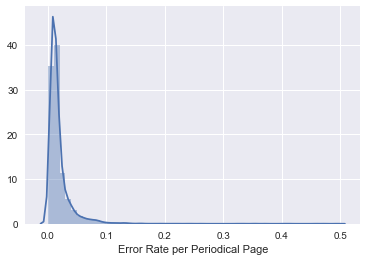

In [39]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [40]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 8053),
 ('t', 4426),
 ('e', 3978),
 ('d', 3950),
 ('w', 3754),
 ('co', 3408),
 ('m', 3171),
 ('n', 3046),
 ('f', 2035),
 ('r', 2028),
 ('th', 1645),
 ('g', 1371),
 ('mo', 1160),
 ('u', 926),
 ('x', 864),
 ('ex', 521),
 ('pa', 410),
 ('q', 399),
 ('sunday-law', 334),
 ('k', 315),
 ("the'", 304),
 ('pp', 299),
 ('tion', 276),
 ("conscience'", 260),
 ('ch', 253),
 ('seventhday', 249),
 ('re', 224),
 ('ga', 220),
 ('oc', 218),
 ('z', 215),
 ('wm', 215),
 ('satolli', 210),
 ('employes', 209),
 ('munn', 207),
 ('ti', 200),
 ('id', 181),
 ('un', 173),
 ('ry', 170),
 ('al', 166),
 ('sunday-closing', 160),
 ('ca', 151),
 ('ment', 146),
 ('chain-gang', 136),
 ("to'", 134),
 ('nd', 130),
 ('ll', 128),
 ('lb', 125),
 ('il', 123),
 ('bateham', 122),
 ('cmsar', 121)]

## Correction 9 -- Separate Squashed Words

In [41]:
# %load shared_elements/separate_squashed_words.py
import pandas as pd
from math import log

prev = cycle
cycle = "correction9"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

verified_tokens = []

for filename in corpus:  
    content = utilities.readfile(directories['prev'], filename)
    clean.get_approved_tokens(content, spelling_dictionary, verified_tokens)

tokens_with_freq = dict(collections.Counter(verified_tokens))
words = pd.DataFrame(list(tokens_with_freq.items()), columns=['token','freq'])
words_sorted = words.sort_values('freq', ascending=False)
words_sorted_short = words_sorted[words_sorted.freq > 2]

sorted_list_of_words = list(words_sorted_short['token'])

wordcost = dict((k, log((i+1)*log(len(sorted_list_of_words)))) for i,k in enumerate(sorted_list_of_words))
maxword = max(len(x) for x in sorted_list_of_words)

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    text = utilities.strip_punct(content)
    tokens = utilities.tokenize_text(text)
    
    replacements = []
    
    for token in tokens:
        if not token.lower() in spelling_dictionary:
            if len(token) > 17:
                if re.search(r"[\-\-\'\"]", token):
                    pass
                else:
                    split_string = clean.infer_spaces(token, wordcost, maxword)
                    list_split_string = split_string.split()
                    
                    if clean.verify_split_string(list_split_string, spelling_dictionary):
                        replacements.append((token, split_string))
                    else:
                        pass
            else:
                pass
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

AmSn18860101-V01-01-page3.txt: [('accordpreservation', 'accord preservation')]
AmSn18860301-V01-03-page6.txt: [('indifferenumeration', 'in differ enumeration')]
AmSn18860301-V01-03-page8.txt: [('whichhasforitsobjectaunionofchurchand', 'which has for its object a union of church and'), ('whichweresosuddenlyconvertedintoreligiopolitical', 'which were so suddenly converted into religio political')]
AmSn18860501-V01-05-page1.txt: [('establishredemption', 'establish redemption')]
AmSn18860601-V01-06-page1.txt: [('theresponsibilities', 'the responsibilities')]
AmSn18860601-V01-06-page6.txt: [('legislaincorporation', 'leg is lain corporation')]
AmSn18860901-V01-09-page6.txt: [('Presbyterianbrother', 'Presbyterian brother')]
AmSn18861001-V01-10-page7.txt: [('elementaryprinciples', 'elementary principles')]
AmSn18861201-V01-12-page8.txt: [('WEhaveaselectstockofthisbeautifulandinstructive', 'WE have a select stock of this beautiful and instructive'), ('Thebookisneatlygottenup', 'The book is neat

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/AmSn/correction9

Average verified rate: 0.9830732455807398

Average of error rates: 0.018591465234258434

Total token count: 8364805



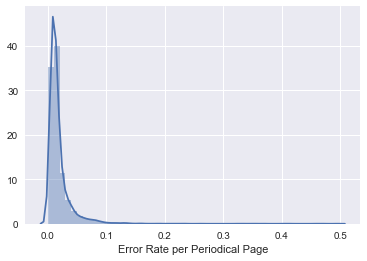

In [42]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [43]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 8053),
 ('t', 4433),
 ('e', 3990),
 ('d', 3954),
 ('w', 3754),
 ('co', 3408),
 ('m', 3174),
 ('n', 3056),
 ('f', 2037),
 ('r', 2033),
 ('th', 1645),
 ('g', 1375),
 ('mo', 1160),
 ('u', 930),
 ('x', 864),
 ('ex', 521),
 ('pa', 410),
 ('q', 399),
 ('sunday-law', 334),
 ('k', 315),
 ("the'", 304),
 ('pp', 299),
 ('tion', 276),
 ("conscience'", 260),
 ('ch', 253),
 ('seventhday', 249),
 ('re', 224),
 ('ga', 220),
 ('oc', 218),
 ('z', 217),
 ('wm', 215),
 ('satolli', 210),
 ('employes', 209),
 ('munn', 207),
 ('ti', 200),
 ('id', 181),
 ('un', 173),
 ('ry', 170),
 ('al', 166),
 ('sunday-closing', 160),
 ('ca', 151),
 ('ment', 146),
 ('chain-gang', 136),
 ("to'", 134),
 ('nd', 130),
 ('ll', 128),
 ('lb', 125),
 ('il', 123),
 ('bateham', 122),
 ('cmsar', 121)]